In [1]:
import pandas as pd, numpy as np , os , gc

In [300]:
#pd.set_option('display.max_rows' , 1000)
#pd.set_option('display.max_rows' , 1000)

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

#Stroke Mortality Data 

In [2]:
stroke = pd.read_csv('StrokeMortality65older2005_2019.csv')

In [3]:
stroke.columns

Index(['Year', 'LocationDesc', 'Topic', 'Data_Value', 'Data_Value_Unit',
       'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Confidence_limit_Low', 'Confidence_limit_High',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'LocationID'],
      dtype='object')

In [4]:
stroke

,Year,LocationDesc,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,LocationID
0,2005,Adair,All stroke,387.3,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NaN,NaN,331.8,456.1,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,29001
1,2005,Andrew,All stroke,420.2,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NaN,NaN,351.9,503.2,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,29003
2,2005,Atchison,All stroke,469.8,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NaN,NaN,376.2,559.1,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,29005
3,2005,Audrain,All stroke,340.7,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NaN,NaN,294.6,426.9,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,29007
4,2005,Barry,All stroke,463.0,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NaN,NaN,388.7,551.4,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,29009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,2019,Washington,All stroke,239.9,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NaN,NaN,194.5,300.7,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,29221
1721,2019,Wayne,All stroke,277.0,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NaN,NaN,229.5,326.7,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,29223
1722,2019,Webster,All stroke,258.4,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NaN,NaN,217.5,310.6,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,29225
1723,2019,Worth,All stroke,228.0,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NaN,NaN,183.6,277.4,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,29227


In [6]:
stroke = stroke[['LocationID', 'LocationDesc','Year',  'Data_Value']]
stroke

,LocationID,LocationDesc,Year,Data_Value
0,29001,Adair,2005,387.3
1,29003,Andrew,2005,420.2
2,29005,Atchison,2005,469.8
3,29007,Audrain,2005,340.7
4,29009,Barry,2005,463.0
...,...,...,...,...
1720,29221,Washington,2019,239.9
1721,29223,Wayne,2019,277.0
1722,29225,Webster,2019,258.4
1723,29227,Worth,2019,228.0


In [7]:
stroke.Year.value_counts()

2019    115
2018    115
2017    115
2016    115
2015    115
2014    115
2013    115
2012    115
2011    115
2010    115
2009    115
2008    115
2007    115
2006    115
2005    115
Name: Year, dtype: int64

In [11]:
stroke = stroke[stroke['Year'] >= 2010]
stroke.shape

(1150, 4)

# Service Area coverage Data (GIS  Output)

In [12]:
saa = pd.read_excel('NEW_HAI_DATAFRAME.xlsx')

In [13]:
saa.columns

Index(['countyfips', 'total_coun', 'COUNTYNAME', 'CO_CLASS', 'Shape_Area',
       'total_county_population', 'county_area', 'block_population_15',
       'coverage_area_15', 'percent_population_cov_15', 'percent_area_cov_15',
       'block_population_30', 'coverage_area_30', 'percent_population_cov_30',
       'percent_area_cov_30', 'block_population_45', 'coverage_area_45',
       'percent_population_cov_45', 'percent_area_cov_45',
       'block_population_60', 'coverage_area_60', 'percent_population_cov_60',
       'percent_area_cov_60', 'Percent_Cov_above', 'HAI', 'Scaled', 'Rounded',
       'PPC_15', 'PPC_30', 'PPC_45', 'PPC_60', 'PPC_GAP', '0-15', '15-30',
       '30-45', '45-60', 'Hospital Count in County',
       'Count of Hospitals with Coverage'],
      dtype='object')

In [17]:
saa

,countyfips,total_coun,COUNTYNAME,CO_CLASS,Shape_Area,total_county_population,county_area,block_population_15,coverage_area_15,percent_population_cov_15,percent_area_cov_15,block_population_30,coverage_area_30,percent_population_cov_30,percent_area_cov_30,block_population_45,coverage_area_45,percent_population_cov_45,percent_area_cov_45,block_population_60,coverage_area_60,percent_population_cov_60,percent_area_cov_60,Percent_Cov_above,HAI,Scaled,Rounded,PPC_15,PPC_30,PPC_45,PPC_60,PPC_GAP,0-15,15-30,30-45,45-60,Hospital Count in County,Count of Hospitals with Coverage
0,1,25314,Adair,3,1.473828e+09,25314,569.05,21891,64.13,86.48,11.27,25267,463.56,99.81,81.46,25314,569.00,100.00,99.99,25314,569.00,100.00,99.99,0.00,267.680,9.602594,10,86.48,99.81,100.00,100.00,0.00,86.48,13.33,0.19,0.00,1,2
1,3,18135,Andrew,3,1.130412e+09,18135,436.45,6242,13.62,34.42,3.12,17627,274.05,97.20,62.79,18135,432.23,100.00,99.03,18135,436.21,100.00,99.94,0.00,218.738,7.846878,8,34.42,97.20,100.00,100.00,0.00,34.42,62.78,2.80,0.00,0,5
2,5,5305,Atchison,3,1.424461e+09,5305,549.99,0,0.00,0.00,0.00,0,0.00,0.00,0.00,1847,89.37,34.82,16.25,5032,360.98,94.85,65.63,5.15,68.832,2.469239,2,0.00,0.00,34.82,94.85,5.15,0.00,0.00,34.82,60.03,0,1
3,7,24962,Audrain,3,1.803529e+09,24962,696.35,2,0.06,0.01,0.01,3370,51.69,13.50,7.42,22747,379.60,91.13,54.51,24962,696.44,100.00,100.00,0.00,115.487,4.142912,4,0.01,13.50,91.13,100.00,0.00,0.01,13.49,77.63,8.87,0,6
4,9,34534,Barry,3,2.046567e+09,34534,790.18,10925,75.54,31.64,9.56,24197,309.17,70.07,39.13,32241,585.03,93.36,74.04,34434,731.92,99.71,92.63,0.29,190.432,6.831445,7,31.64,70.07,93.36,99.71,0.29,31.64,38.43,23.29,6.35,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,223,10974,Wayne,3,2.005505e+09,10974,774.33,104,0.53,0.95,0.07,2981,60.58,27.16,7.82,7326,231.79,66.76,29.93,10963,718.19,99.90,92.75,0.10,112.599,4.039310,4,0.95,27.16,66.76,99.90,0.10,0.95,26.21,39.60,33.14,0,3
111,225,39085,Webster,3,1.536456e+09,39085,593.23,373,0.02,0.95,0.00,13897,81.75,35.56,13.78,37497,383.83,95.94,64.70,39070,578.19,99.96,97.46,0.04,136.851,4.909312,5,0.95,35.56,95.94,99.96,0.04,0.95,34.61,60.38,4.02,0,6
112,227,1973,Worth,3,6.909025e+08,1973,266.76,8,0.09,0.41,0.03,1494,84.37,75.72,31.63,1973,266.68,100.00,99.97,1973,266.68,100.00,99.97,0.00,170.945,6.132380,6,0.41,75.72,100.00,100.00,0.00,0.41,75.31,24.28,0.00,0,4
113,229,18188,Wright,3,1.768622e+09,18188,682.87,0,0.00,0.00,0.00,3174,4.27,17.45,0.63,12879,200.66,70.81,29.38,18148,598.93,99.78,87.71,0.22,106.358,3.815424,4,0.00,17.45,70.81,99.78,0.22,0.00,17.45,53.36,28.97,0,4


In [18]:
saa = saa[['countyfips',  'COUNTYNAME', 
       'county_area',
        'percent_population_cov_15', 'percent_area_cov_15',
      'percent_population_cov_30',
       'percent_area_cov_30', 
       'percent_population_cov_45', 'percent_area_cov_45',
        'percent_population_cov_60',
       'percent_area_cov_60', 'Percent_Cov_above'
     , '0-15', '15-30','30-45', '45-60', 'Hospital Count in County',
       'Count of Hospitals with Coverage']]

In [19]:
saa

,countyfips,COUNTYNAME,county_area,percent_population_cov_15,percent_area_cov_15,percent_population_cov_30,percent_area_cov_30,percent_population_cov_45,percent_area_cov_45,percent_population_cov_60,percent_area_cov_60,Percent_Cov_above,0-15,15-30,30-45,45-60,Hospital Count in County,Count of Hospitals with Coverage
0,1,Adair,569.05,86.48,11.27,99.81,81.46,100.00,99.99,100.00,99.99,0.00,86.48,13.33,0.19,0.00,1,2
1,3,Andrew,436.45,34.42,3.12,97.20,62.79,100.00,99.03,100.00,99.94,0.00,34.42,62.78,2.80,0.00,0,5
2,5,Atchison,549.99,0.00,0.00,0.00,0.00,34.82,16.25,94.85,65.63,5.15,0.00,0.00,34.82,60.03,0,1
3,7,Audrain,696.35,0.01,0.01,13.50,7.42,91.13,54.51,100.00,100.00,0.00,0.01,13.49,77.63,8.87,0,6
4,9,Barry,790.18,31.64,9.56,70.07,39.13,93.36,74.04,99.71,92.63,0.29,31.64,38.43,23.29,6.35,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,223,Wayne,774.33,0.95,0.07,27.16,7.82,66.76,29.93,99.90,92.75,0.10,0.95,26.21,39.60,33.14,0,3
111,225,Webster,593.23,0.95,0.00,35.56,13.78,95.94,64.70,99.96,97.46,0.04,0.95,34.61,60.38,4.02,0,6
112,227,Worth,266.76,0.41,0.03,75.72,31.63,100.00,99.97,100.00,99.97,0.00,0.41,75.31,24.28,0.00,0,4
113,229,Wright,682.87,0.00,0.00,17.45,0.63,70.81,29.38,99.78,87.71,0.22,0.00,17.45,53.36,28.97,0,4


# Health Care Accessibilty Index (PCA)

In [52]:
saa_index = saa[['countyfips',  'COUNTYNAME', 
         'percent_area_cov_15',
      
       'percent_area_cov_30', 
       'percent_area_cov_45',
        
       'percent_area_cov_60', 'Percent_Cov_above'
     , '0-15', '15-30','30-45', '45-60', 'Hospital Count in County',
       'Count of Hospitals with Coverage']]

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


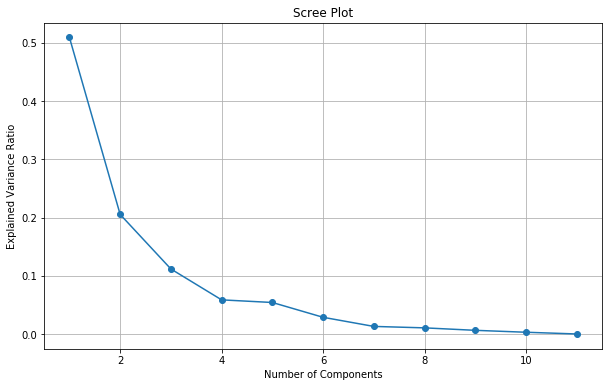

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(saa_index.iloc[:,2:])

pca = PCA()
pca.fit(data_scaled)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


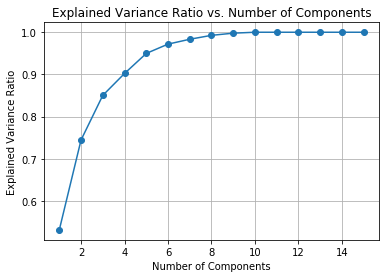

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(saa_index.iloc[:,2:])


num_components = np.arange(1, min(saa_index.shape[0], saa_index.shape[1]-2) + 1)
explained_variances = []

for n in num_components:
    pca = PCA(n_components=n)
    pca.fit(data_scaled)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

plt.plot(num_components, explained_variances, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

In [80]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
data_scaled = scaler.fit_transform(saa_index.iloc[:,2:])


pca = PCA(n_components=4)  # Choose the number of components you want
pca.fit(data_scaled)


loadings = pca.components_
display(loadings)


index = data_scaled.dot(loadings[:4].T)
pd.DataFrame(index)

saa_index['HAI_Index'] = index
saa_index['HAI_Index4'] = index.sum(axis = 1)

saa_index.head()

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.30082121,  0.35346942,  0.321014  ,  0.20688926, -0.11683427,
         0.32866747,  0.06389113, -0.26567388, -0.24078473,  0.27894143,
         0.2703416 ,  0.36938556,  0.31154405],
       [ 0.23314876,  0.03729053, -0.25995999, -0.47027132,  0.46178907,
         0.15316546, -0.41732454, -0.20793873,  0.25570163,  0.23151455,
         0.00492384, -0.05346319,  0.28203689],
       [-0.25906843,  0.06022027,  0.11273328, -0.24973505,  0.44302837,
        -0.09773047,  0.55254035, -0.36301532, -0.27650995, -0.26146021,
        -0.10702264, -0.03444931,  0.23197959],
       [ 0.13282417, -0.23562345, -0.15034468, -0.04450821,  0.10901085,
        -0.40713585,  0.24563282,  0.2924034 , -0.05082883,  0.19013994,
         0.70582432, -0.02689104,  0.20280229]])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,countyfips,COUNTYNAME,percent_area_cov_15,percent_area_cov_30,percent_area_cov_45,percent_area_cov_60,Percent_Cov_above,0-15,15-30,30-45,45-60,Hospital Count in County,Count of Hospitals with Coverage,HAI_Index,HAI_Index4
0,1,Adair,11.27,81.46,99.99,99.99,0.00,86.48,13.33,0.19,0.00,1,2,1.955648,-0.086369
1,3,Andrew,3.12,62.79,99.03,99.94,0.00,34.42,62.78,2.80,0.00,0,5,1.020016,0.643852
2,5,Atchison,0.00,0.00,16.25,65.63,5.15,0.00,0.00,34.82,60.03,0,1,-4.079714,-4.042513
3,7,Audrain,0.01,7.42,54.51,100.00,0.00,0.01,13.49,77.63,8.87,0,6,-2.141315,-3.767760
4,9,Barry,9.56,39.13,74.04,92.63,0.29,31.64,38.43,23.29,6.35,1,4,0.160494,-0.207037


In [81]:
saa_index.to_csv('saa_index_4.csv' , index = False)

In [76]:
index.sum(axis = 1)

array([ 0.69007516,  0.61070967, -3.77184455, -3.63301503, -0.12019549,
       -4.92991446, -2.45470714, -2.69395351, -3.30675422,  2.59079696,
        3.10381522,  0.59533175,  2.06695421,  0.30173293,  0.04181465,
        2.25675871,  2.29484955, -1.85046372,  4.48385571,  1.02212697,
       -2.27605962,  0.97056655,  4.0575487 ,  6.05549524,  3.59822096,
        3.29458218, -0.95754   ,  0.60086993, -4.13671344, -2.78269586,
        2.34097611,  2.08056963,  0.81299273, -2.47885573,  1.90113095,
        3.79050487, -3.59048558,  1.96552376,  2.91427665,  2.11906732,
        2.28633765, -3.51133304, -3.13643537, -3.84227995, -3.68208468,
        0.31409323, -1.06628011,  9.46075525,  0.69856385,  5.23950365,
        3.09394019, -4.47788743, -4.45852583,  3.28525542,  0.82404613,
       -4.22193004,  0.85263528, -3.8247157 ,  2.02559938, -4.36791565,
       -1.26893206, -0.72218096, -2.47225212,  0.46513919, -1.60233454,
       -0.7446723 , -4.15173263, -0.5372315 , -1.11711865, -2.99

In [71]:
sum([1.98306467e+00,  5.15964483e-01,  2.63819323e-01,
        -2.07277332e+00])

0.6900751559999998

In [85]:
saa_index.tail()

,countyfips,COUNTYNAME,percent_area_cov_15,percent_area_cov_30,percent_area_cov_45,percent_area_cov_60,Percent_Cov_above,0-15,15-30,30-45,45-60,Hospital Count in County,Count of Hospitals with Coverage,HAI_Index,HAI_Index4
110,223,Wayne,0.07,7.82,29.93,92.75,0.10,0.95,26.21,39.60,33.14,0,3,-2.695533,-3.663131
111,225,Webster,0.00,13.78,64.70,97.46,0.04,0.95,34.61,60.38,4.02,0,6,-1.507533,-2.386207
112,227,Worth,0.03,31.63,99.97,99.97,0.00,0.41,75.31,24.28,0.00,0,4,-0.209482,-0.580546
113,229,Wright,0.00,0.63,29.38,87.71,0.22,0.00,17.45,53.36,28.97,0,4,-2.923567,-3.746570
114,510,St Louis City,92.51,100.00,99.90,99.90,0.00,100.00,0.00,0.00,0.00,2,15,6.251037,7.929329


In [58]:
pca.explained_variance_ratio_

array([0.55005982, 0.18812961, 0.10231693, 0.05369124])

In [65]:
loadings.T

array([[ 3.05774226e-01,  3.04159915e-01, -2.00715506e-01,
         1.58794052e-01],
       [ 3.67781545e-01,  8.76066358e-02,  1.26858106e-01,
        -1.91815911e-01],
       [ 3.47589386e-01, -2.30947852e-01,  1.19104214e-01,
        -1.35226930e-01],
       [ 2.44860766e-01, -4.30354633e-01, -3.08794630e-01,
        -1.13406358e-01],
       [-1.54279236e-01,  4.13048509e-01,  5.10140447e-01,
         2.14653344e-01],
       [ 3.39970655e-01,  2.24039904e-01, -4.08192233e-03,
        -3.78467454e-01],
       [ 7.65647663e-02, -4.83201159e-01,  4.81131140e-01,
         2.86137277e-01],
       [-2.62416207e-01, -2.22859758e-01, -4.60008340e-01,
         1.97337734e-01],
       [-2.59260618e-01,  2.59368443e-01, -2.62276766e-01,
        -8.56635578e-02],
       [ 2.82643643e-01,  2.98145064e-01, -2.10433690e-01,
         2.14707403e-01],
       [ 2.78845752e-01,  3.39787249e-02, -1.32868902e-01,
         7.37072502e-01],
       [ 3.89228305e-01, -1.38777878e-17,  3.85108612e-16,
      

In [83]:
saa_index['HAI_Index'].describe()

count    1.150000e+02
mean     1.390192e-16
std      2.706643e+00
min     -4.198595e+00
25%     -2.249596e+00
50%     -2.059827e-01
75%      2.177959e+00
max      8.071462e+00
Name: HAI_Index, dtype: float64

In [84]:
saa_index['HAI_Index4'].describe()

count    1.150000e+02
mean    -3.707179e-16
std      3.439952e+00
min     -5.369636e+00
25%     -3.005914e+00
50%     -2.070368e-01
75%      2.063551e+00
max      1.190424e+01
Name: HAI_Index4, dtype: float64

# ACS 5 year Data Profiles (Selected Variables)

In [100]:
dp02 = pd.read_csv('./ACS/ACS5yr_DP02/education_attainment.csv')

In [101]:
dp02.columns

Index(['Geography', 'Geographic Area Name', 'Year',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree'],
      dtype='object')

In [98]:
dp03 = pd.read_csv('./ACS/ACS5yr_DP03/DP03_final.csv')

In [104]:
dp03.columns

Index(['Geography', 'Geographic Area Name', 'Year',
       'Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force',
       'Percent!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate',
       'Percent!!INCOME AND BENEFITS !!Total households!!Less than $10,000',
       'Percent!!INCOME AND BENEFITS !!Total households!!$10,000 to $14,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$15,000 to $24,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$25,000 to $34,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$35,000 to $49,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$50,000 to $74,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$75,000 to $99,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$100,000 to $149,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$150,000 to $199,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$200,000 or more',
      

In [106]:
stroke.head()

,LocationID,LocationDesc,Year,Data_Value
575,29001,Adair,2010,324.2
576,29003,Andrew,2010,301.4
577,29005,Atchison,2010,341.0
578,29007,Audrain,2010,302.4
579,29009,Barry,2010,371.5


In [107]:
dp02.head()

,Geography,Geographic Area Name,Year,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade,"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma",Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency),"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree",Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree
0,0500000US29001,"Adair County, Missouri",2022,0.03,0.06,0.32,0.18,0.08,0.15,0.19
1,0500000US29003,"Andrew County, Missouri",2022,0.02,0.04,0.39,0.22,0.08,0.17,0.10
2,0500000US29005,"Atchison County, Missouri",2022,0.03,0.06,0.42,0.23,0.04,0.16,0.06
3,0500000US29007,"Audrain County, Missouri",2022,0.06,0.08,0.42,0.21,0.09,0.10,0.05
4,0500000US29009,"Barry County, Missouri",2022,0.04,0.10,0.42,0.20,0.09,0.10,0.05


In [123]:
dp02['LocationID'] = dp02['Geography'].astype(str).str[-5:].astype(int)
dp03['LocationID'] = dp03['Geography'].astype(str).str[-5:].astype(int)
dp02

,Geography,Geographic Area Name,Year,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade,"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma",Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency),"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree",Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree,LocationID
0,0500000US29001,"Adair County, Missouri",2022,0.030,0.060,0.320,0.180,0.080,0.150,0.190,29001
1,0500000US29003,"Andrew County, Missouri",2022,0.020,0.040,0.390,0.220,0.080,0.170,0.100,29003
2,0500000US29005,"Atchison County, Missouri",2022,0.030,0.060,0.420,0.230,0.040,0.160,0.060,29005
3,0500000US29007,"Audrain County, Missouri",2022,0.060,0.080,0.420,0.210,0.090,0.100,0.050,29007
4,0500000US29009,"Barry County, Missouri",2022,0.040,0.100,0.420,0.200,0.090,0.100,0.050,29009
...,...,...,...,...,...,...,...,...,...,...,...
1490,0500000US29223,"Wayne County, Missouri",2010,0.085,0.155,0.390,0.220,0.060,0.070,0.030,29223
1491,0500000US29225,"Webster County, Missouri",2010,0.055,0.080,0.390,0.225,0.075,0.105,0.060,29225
1492,0500000US29227,"Worth County, Missouri",2010,0.040,0.070,0.440,0.210,0.060,0.115,0.060,29227
1493,0500000US29229,"Wright County, Missouri",2010,0.080,0.115,0.425,0.190,0.060,0.070,0.045,29229


In [124]:
dp02.dtypes

Geography                                                                                                      object 
Geographic Area Name                                                                                           object 
Year                                                                                                           int64  
Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade                            float64
Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma                  float64
Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)    float64
Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree                        float64
Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree                             float64
Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 

In [154]:
merged_df = pd.merge(stroke , dp02 , on = ['LocationID' , 'Year'] , how = 'left')
merged_df

,LocationID,LocationDesc,Year,Data_Value,Geography,Geographic Area Name,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade,"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma",Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency),"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree",Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree
0,29001,Adair,2010,324.2,0500000US29001,"Adair County, Missouri",0.030,0.060,0.340,0.180,0.065,0.150,0.16
1,29003,Andrew,2010,301.4,0500000US29003,"Andrew County, Missouri",0.030,0.060,0.380,0.220,0.065,0.160,0.09
2,29005,Atchison,2010,341.0,0500000US29005,"Atchison County, Missouri",0.030,0.065,0.415,0.205,0.060,0.165,0.06
3,29007,Audrain,2010,302.4,0500000US29007,"Audrain County, Missouri",0.045,0.100,0.460,0.190,0.070,0.090,0.05
4,29009,Barry,2010,371.5,0500000US29009,"Barry County, Missouri",0.065,0.110,0.410,0.200,0.070,0.095,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,29221,Washington,2019,239.9,0500000US29221,"Washington County, Missouri",0.060,0.170,0.370,0.210,0.080,0.060,0.04
1146,29223,Wayne,2019,277.0,0500000US29223,"Wayne County, Missouri",0.070,0.160,0.390,0.220,0.060,0.060,0.04
1147,29225,Webster,2019,258.4,0500000US29225,"Webster County, Missouri",0.050,0.080,0.370,0.250,0.070,0.100,0.07
1148,29227,Worth,2019,228.0,0500000US29227,"Worth County, Missouri",0.040,0.060,0.440,0.210,0.050,0.130,0.07


In [155]:
merged_df = pd.merge(merged_df , dp03 , on = ['LocationID' , 'Year'] , how = 'left')
merged_df

,LocationID,LocationDesc,Year,Data_Value,Geography_x,Geographic Area Name_x,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade,"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma",Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency),"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree",Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree,Geography_y,Geographic Area Name_y,Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Percent!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate,"Percent!!INCOME AND BENEFITS !!Total households!!Less than $10,000","Percent!!INCOME AND BENEFITS !!Total households!!$10,000 to $14,999","Percent!!INCOME AND BENEFITS !!Total households!!$15,000 to $24,999","Percent!!INCOME AND BENEFITS !!Total households!!$25,000 to $34,999","Percent!!INCOME AND BENEFITS !!Total households!!$35,000 to $49,999","Percent!!INCOME AND BENEFITS !!Total households!!$50,000 to $74,999","Percent!!INCOME AND BENEFITS !!Total households!!$75,000 to $99,999","Percent!!INCOME AND BENEFITS !!Total households!!$100,000 to $149,999","Percent!!INCOME AND BENEFITS !!Total households!!$150,000 to $199,999","Percent!!INCOME AND BENEFITS !!Total households!!$200,000 or more",Percent!!INCOME AND BENEFITS !!Total households!!With earnings,Estimate!!INCOME AND BENEFITS !!Total households!!Median household income (dollars),Estimate!!INCOME AND BENEFITS !!Total households!!Mean household income (dollars),Estimate!!INCOME AND BENEFITS !!Total households!!With earnings!!Mean earnings (dollars),Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With private health insurance,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With public coverage,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!No health insurance coverage,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!18 to 64 years,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!65 years and over
0,29001,Adair,2010,324.2,0500000US29001,"Adair County, Missouri",0.030,0.060,0.340,0.180,0.065,0.150,0.16,0500000US29001,"Adair County, Missouri",57.6,5.8,17.3,9.7,13.4,13.8,13.9,15.5,7.6,5.6,2.3,0.8,80.5,31176.0,43603.0,42212.0,86.3,69.4,27.9,13.7,26.0,21.8,29.8,13.8
1,29003,Andrew,2010,301.4,0500000US29003,"Andrew County, Missouri",0.030,0.060,0.380,0.220,0.065,0.160,0.09,0500000US29003,"Andrew County, Missouri",70.8,6.6,5.9,5.9,11.0,11.2,13.1,23.0,13.9,12.8,2.4,0.8,80.7,52720.0,61497.0,63118.0,90.5,76.7,26.0,9.5,8.5,7.5,8.2,11.4
2,29005,Atchison,2010,341.0,0500000US29005,"Atchison County, Missouri",0.030,0.065,0.415,0.205,0.060,0.165,0.06,0500000US29005,"Atchison County, Missouri",62.6,4.7,7.6,7.9,11.8,13.9,15.3,23.8,9.0,6.8,1.4,2.5,75.2,42375.0,55097.0,57499.0,86.6,71.1,32.3,13.4,13.1,15.6,10.1,19.3
3,29007,Audrain,2010,302.4,0500000US29007,"Audrain County, Missouri",0.045,0.100,0.460,0.190,0.070,0.090,0.05,0500000US29007,"Audrain County, Missouri",56.0,4.3,6.5,8.6,12.7,15.5,15.4,23.3,9.0,6.8,1.3,1.0,74.8,40935.0,50277.0,49594

# County Health Ranking Data  (Selected Features) 

In [148]:
chr_data = pd.read_csv('new_chr_csv1.csv')

In [149]:
chr_data.columns

Index(['Unnamed: 0', 'Adult obesity_% Obese', 'Adult smoking_% Smokers',
       'Clinical Care_Rank', 'County', 'FIPS', 'Health Behaviors_Rank',
       'Health Factors_Rank', 'Health Outcomes_Rank',
       'Physical Environment_Rank',
       'Poor mental health days_Mentally Unhealthy Days',
       'Poor or fair health_% Fair/Poor',
       'Poor physical health days_Physically Unhealthy Days',
       'Social & Economic Factors_Rank', 'State', 'Unemployment_% Unemployed',
       'Uninsured adults_% Uninsured', 'Violent Crime Rate', 'year'],
      dtype='object')

In [150]:
chr_data

,Unnamed: 0,Adult obesity_% Obese,Adult smoking_% Smokers,Clinical Care_Rank,County,FIPS,Health Behaviors_Rank,Health Factors_Rank,Health Outcomes_Rank,Physical Environment_Rank,Poor mental health days_Mentally Unhealthy Days,Poor or fair health_% Fair/Poor,Poor physical health days_Physically Unhealthy Days,Social & Economic Factors_Rank,State,Unemployment_% Unemployed,Uninsured adults_% Uninsured,Violent Crime Rate,year
0,1,30.7,22.311543,5.0,Adair,29001,36.0,36.0,71.0,83.0,4.740753,20.080050,4.946602,80.0,Missouri,4.361035,14.361997,247.607444,2019
1,2,32.9,18.135443,19.0,Andrew,29003,4.0,6.0,8.0,44.0,4.033326,14.848926,4.049459,6.0,Missouri,3.135397,12.512124,184.177962,2019
2,3,33.3,18.418132,75.0,Atchison,29005,6.0,9.0,24.0,11.0,4.194421,16.246522,4.189911,7.0,Missouri,3.514377,12.555900,103.412616,2019
3,4,35.0,21.175243,27.0,Audrain,29007,79.0,58.0,50.0,20.0,4.509256,18.028495,4.596011,66.0,Missouri,3.538447,14.368068,182.945617,2019
4,5,32.5,23.477209,60.0,Barry,29009,84.0,65.0,86.0,37.0,4.715085,22.362148,4.955659,54.0,Missouri,3.435039,19.712709,242.193136,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,111,29.8,22.478166,44.0,Wayne,29223,66.0,84.0,107.0,68.0,5.840000,31.950000,6.370000,92.0,Missouri,6.800000,16.200000,112.142708,2010
1146,112,29.0,28.700000,37.0,Webster,29225,47.0,31.0,27.0,10.0,3.510000,12.840000,2.960000,49.0,Missouri,5.600000,16.500000,199.485138,2010
1147,113,28.4,17.340000,58.0,Worth,29227,4.0,16.0,46.0,37.0,2.630000,18.282321,2.680000,52.0,Missouri,5.600000,20.500000,300.966260,2010
1148,114,29.6,18.950000,13.0,Wright,29229,19.0,52.0,100.0,12.0,4.500000,20.940000,4.810000,102.0,Missouri,7.200000,15.800000,201.712724,2010


In [151]:
chr_data = chr_data[['Adult obesity_% Obese', 'Adult smoking_% Smokers',
      'FIPS', 
       'Physical Environment_Rank',
       'Poor mental health days_Mentally Unhealthy Days',
       'Poor or fair health_% Fair/Poor',
       'Poor physical health days_Physically Unhealthy Days',
       'Violent Crime Rate', 'year']]

In [152]:
chr_data.rename({'FIPS':'LocationID' , 'year':'Year'} , axis= 1 , inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [153]:
chr_data

,Adult obesity_% Obese,Adult smoking_% Smokers,LocationID,Physical Environment_Rank,Poor mental health days_Mentally Unhealthy Days,Poor or fair health_% Fair/Poor,Poor physical health days_Physically Unhealthy Days,Violent Crime Rate,Year
0,30.7,22.311543,29001,83.0,4.740753,20.080050,4.946602,247.607444,2019
1,32.9,18.135443,29003,44.0,4.033326,14.848926,4.049459,184.177962,2019
2,33.3,18.418132,29005,11.0,4.194421,16.246522,4.189911,103.412616,2019
3,35.0,21.175243,29007,20.0,4.509256,18.028495,4.596011,182.945617,2019
4,32.5,23.477209,29009,37.0,4.715085,22.362148,4.955659,242.193136,2019
...,...,...,...,...,...,...,...,...,...
1145,29.8,22.478166,29223,68.0,5.840000,31.950000,6.370000,112.142708,2010
1146,29.0,28.700000,29225,10.0,3.510000,12.840000,2.960000,199.485138,2010
1147,28.4,17.340000,29227,37.0,2.630000,18.282321,2.680000,300.966260,2010
1148,29.6,18.950000,29229,12.0,4.500000,20.940000,4.810000,201.712724,2010


In [156]:
merged_df = pd.merge(merged_df , chr_data , on = ['LocationID' , 'Year'] , how = 'left')
merged_df

,LocationID,LocationDesc,Year,Data_Value,Geography_x,Geographic Area Name_x,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade,"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma",Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency),"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree",Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree,Geography_y,Geographic Area Name_y,Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Percent!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate,"Percent!!INCOME AND BENEFITS !!Total households!!Less than $10,000","Percent!!INCOME AND BENEFITS !!Total households!!$10,000 to $14,999","Percent!!INCOME AND BENEFITS !!Total households!!$15,000 to $24,999","Percent!!INCOME AND BENEFITS !!Total households!!$25,000 to $34,999","Percent!!INCOME AND BENEFITS !!Total households!!$35,000 to $49,999","Percent!!INCOME AND BENEFITS !!Total households!!$50,000 to $74,999","Percent!!INCOME AND BENEFITS !!Total households!!$75,000 to $99,999","Percent!!INCOME AND BENEFITS !!Total households!!$100,000 to $149,999","Percent!!INCOME AND BENEFITS !!Total households!!$150,000 to $199,999","Percent!!INCOME AND BENEFITS !!Total households!!$200,000 or more",Percent!!INCOME AND BENEFITS !!Total households!!With earnings,Estimate!!INCOME AND BENEFITS !!Total households!!Median household income (dollars),Estimate!!INCOME AND BENEFITS !!Total households!!Mean household income (dollars),Estimate!!INCOME AND BENEFITS !!Total households!!With earnings!!Mean earnings (dollars),Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With private health insurance,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With public coverage,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!No health insurance coverage,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!18 to 64 years,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!65 years and over,Adult obesity_% Obese,Adult smoking_% Smokers,Physical Environment_Rank,Poor mental health days_Mentally Unhealthy Days,Poor or fair health_% Fair/Poor,Poor physical health days_Physically Unhealthy Days,Violent Crime Rate
0,29001,Adair,2010,324.2,0500000US29001,"Adair County, Missouri",0.030,0.060,0.340,0.180,0.065,0.150,0.16,0500000US29001,"Adair County, Missouri",57.6,5.8,17.3,9.7,13.4,13.8,13.9,15.5,7.6,5.6,2.3,0.8,80.5,31176.0,43603.0,42212.0,86.3,69.4,27.9,13.7,26.0,21.8,29.8,13.8,29.0,19.700000,56.0,3.320000,18.980000,4.350000,431.775423
1,29003,Andrew,2010,301.4,0500000US29003,"Andrew County, Missouri",0.030,0.060,0.380,0.220,0.065,0.160,0.09,0500000US29003,"Andrew County, Missouri",70.8,6.6,5.9,5.9,11.0,11.2,13.1,23.0,13.9,12.8,2.4,0.8,80.7,52720.0,61497.0,63118.0,90.5,76.7,26.0,9.5,8.5,7.5,8.2,11.4,29.6,22.830000,39.0,3.010000,16.040000,3.180000,81.661920
2,29005,Atchison,2010,341.0,0500000US29005,"Atchison County, Missouri",0.030,0.065,0.415,0.205,0.060,0.165,0.06,0500000US29005,"Atchison County, Missouri",62.6,4.7,7.6,

# CDC Cormobidity and Lifestyle choices Data 

In [158]:
cdc1 = pd.read_csv('combined_obesity_2005-2019.csv')
cdc2 = pd.read_csv('combined_diabetes_2005-2019.csv')
cdc3 = pd.read_csv('combined_PHYinact_2005-2019 (1).csv')


In [163]:
cdc1.columns

Index(['County', 'State', 'CountyFIPS', 'Percentage', 'Lower Limit',
       ' Upper Limit', 'Year'],
      dtype='object')

In [167]:
del merged_df['Adult obesity_% Obese']

In [174]:
cdc1 = cdc1[[ 'CountyFIPS', 'Percentage', 'Year']]
cdc1.rename({'CountyFIPS': 'LocationID' ,'Percentage': 'Obesity%'  } , axis = 1 , inplace = True)
cdc1['Year'] = cdc1['Year'].astype(int)
cdc1['LocationID'] = cdc1['LocationID'].astype(int)

In [175]:
cdc2 = cdc2[[ 'CountyFIPS', 'Percentage', 'Year']]
cdc2.rename({'CountyFIPS': 'LocationID' ,'Percentage': 'Diabetes%'  } , axis = 1 , inplace = True)
cdc2['Year'] = cdc2['Year'].astype(int)
cdc2['LocationID'] = cdc2['LocationID'].astype(int)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [176]:
cdc3 = cdc3[[ 'CountyFIPS', 'Percentage', 'Year']]
cdc3.rename({'CountyFIPS': 'LocationID' ,'Percentage': 'Physical_Inactivity%'  } , axis = 1 , inplace = True)
cdc3['Year'] = cdc3['Year'].astype(int)
cdc3['LocationID'] = cdc3['LocationID'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [178]:
gc.collect()

14679

In [179]:
merged_df = pd.merge(merged_df , cdc1 , on = ['LocationID' , 'Year'] , how = 'left')
merged_df

,LocationID,LocationDesc,Year,Data_Value,Geography_x,Geographic Area Name_x,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade,"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma",Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency),"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree",Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree,Geography_y,Geographic Area Name_y,Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Percent!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate,"Percent!!INCOME AND BENEFITS !!Total households!!Less than $10,000","Percent!!INCOME AND BENEFITS !!Total households!!$10,000 to $14,999","Percent!!INCOME AND BENEFITS !!Total households!!$15,000 to $24,999","Percent!!INCOME AND BENEFITS !!Total households!!$25,000 to $34,999","Percent!!INCOME AND BENEFITS !!Total households!!$35,000 to $49,999","Percent!!INCOME AND BENEFITS !!Total households!!$50,000 to $74,999","Percent!!INCOME AND BENEFITS !!Total households!!$75,000 to $99,999","Percent!!INCOME AND BENEFITS !!Total households!!$100,000 to $149,999","Percent!!INCOME AND BENEFITS !!Total households!!$150,000 to $199,999","Percent!!INCOME AND BENEFITS !!Total households!!$200,000 or more",Percent!!INCOME AND BENEFITS !!Total households!!With earnings,Estimate!!INCOME AND BENEFITS !!Total households!!Median household income (dollars),Estimate!!INCOME AND BENEFITS !!Total households!!Mean household income (dollars),Estimate!!INCOME AND BENEFITS !!Total households!!With earnings!!Mean earnings (dollars),Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With private health insurance,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With public coverage,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!No health insurance coverage,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!18 to 64 years,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!65 years and over,Adult smoking_% Smokers,Physical Environment_Rank,Poor mental health days_Mentally Unhealthy Days,Poor or fair health_% Fair/Poor,Poor physical health days_Physically Unhealthy Days,Violent Crime Rate,Obesity%
0,29001,Adair,2010,324.2,0500000US29001,"Adair County, Missouri",0.030,0.060,0.340,0.180,0.065,0.150,0.16,0500000US29001,"Adair County, Missouri",57.6,5.8,17.3,9.7,13.4,13.8,13.9,15.5,7.6,5.6,2.3,0.8,80.5,31176.0,43603.0,42212.0,86.3,69.4,27.9,13.7,26.0,21.8,29.8,13.8,19.700000,56.0,3.320000,18.980000,4.350000,431.775423,18.8
1,29003,Andrew,2010,301.4,0500000US29003,"Andrew County, Missouri",0.030,0.060,0.380,0.220,0.065,0.160,0.09,0500000US29003,"Andrew County, Missouri",70.8,6.6,5.9,5.9,11.0,11.2,13.1,23.0,13.9,12.8,2.4,0.8,80.7,52720.0,61497.0,63118.0,90.5,76.7,26.0,9.5,8.5,7.5,8.2,11.4,22.830000,39.0,3.010000,16.040000,3.180000,81.661920,22.8
2,29005,Atchison,2010,341.0,0500000US29005,"Atchison County, Missouri",0.030,0.065,0.415,0.205,0.060,0.165,0.06,0500000US29005,"Atchison County, Missouri",62.6,4.7,7.6,7.9,11.8,13.9

In [180]:
merged_df = pd.merge(merged_df , cdc2 , on = ['LocationID' , 'Year'] , how = 'left')
merged_df

,LocationID,LocationDesc,Year,Data_Value,Geography_x,Geographic Area Name_x,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade,"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma",Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency),"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree",Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree,Geography_y,Geographic Area Name_y,Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Percent!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate,"Percent!!INCOME AND BENEFITS !!Total households!!Less than $10,000","Percent!!INCOME AND BENEFITS !!Total households!!$10,000 to $14,999","Percent!!INCOME AND BENEFITS !!Total households!!$15,000 to $24,999","Percent!!INCOME AND BENEFITS !!Total households!!$25,000 to $34,999","Percent!!INCOME AND BENEFITS !!Total households!!$35,000 to $49,999","Percent!!INCOME AND BENEFITS !!Total households!!$50,000 to $74,999","Percent!!INCOME AND BENEFITS !!Total households!!$75,000 to $99,999","Percent!!INCOME AND BENEFITS !!Total households!!$100,000 to $149,999","Percent!!INCOME AND BENEFITS !!Total households!!$150,000 to $199,999","Percent!!INCOME AND BENEFITS !!Total households!!$200,000 or more",Percent!!INCOME AND BENEFITS !!Total households!!With earnings,Estimate!!INCOME AND BENEFITS !!Total households!!Median household income (dollars),Estimate!!INCOME AND BENEFITS !!Total households!!Mean household income (dollars),Estimate!!INCOME AND BENEFITS !!Total households!!With earnings!!Mean earnings (dollars),Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With private health insurance,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With public coverage,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!No health insurance coverage,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!18 to 64 years,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!65 years and over,Adult smoking_% Smokers,Physical Environment_Rank,Poor mental health days_Mentally Unhealthy Days,Poor or fair health_% Fair/Poor,Poor physical health days_Physically Unhealthy Days,Violent Crime Rate,Obesity%,Diabetes%
0,29001,Adair,2010,324.2,0500000US29001,"Adair County, Missouri",0.030,0.060,0.340,0.180,0.065,0.150,0.16,0500000US29001,"Adair County, Missouri",57.6,5.8,17.3,9.7,13.4,13.8,13.9,15.5,7.6,5.6,2.3,0.8,80.5,31176.0,43603.0,42212.0,86.3,69.4,27.9,13.7,26.0,21.8,29.8,13.8,19.700000,56.0,3.320000,18.980000,4.350000,431.775423,18.8,17.8
1,29003,Andrew,2010,301.4,0500000US29003,"Andrew County, Missouri",0.030,0.060,0.380,0.220,0.065,0.160,0.09,0500000US29003,"Andrew County, Missouri",70.8,6.6,5.9,5.9,11.0,11.2,13.1,23.0,13.9,12.8,2.4,0.8,80.7,52720.0,61497.0,63118.0,90.5,76.7,26.0,9.5,8.5,7.5,8.2,11.4,22.830000,39.0,3.010000,16.040000,3.180000,81.661920,22.8,15.7
2,29005,Atchison,2010,341.0,0500000US29005,"Atchison County, Missouri",0.030,0.065,0.415,0.205,0.060,0.165,0.06,0500000US29005,"Atchison County, Missouri",62.6,4

In [181]:
merged_df = pd.merge(merged_df , cdc3 , on = ['LocationID' , 'Year'] , how = 'left')
merged_df

,LocationID,LocationDesc,Year,Data_Value,Geography_x,Geographic Area Name_x,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade,"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma",Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency),"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree",Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree,Geography_y,Geographic Area Name_y,Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Percent!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate,"Percent!!INCOME AND BENEFITS !!Total households!!Less than $10,000","Percent!!INCOME AND BENEFITS !!Total households!!$10,000 to $14,999","Percent!!INCOME AND BENEFITS !!Total households!!$15,000 to $24,999","Percent!!INCOME AND BENEFITS !!Total households!!$25,000 to $34,999","Percent!!INCOME AND BENEFITS !!Total households!!$35,000 to $49,999","Percent!!INCOME AND BENEFITS !!Total households!!$50,000 to $74,999","Percent!!INCOME AND BENEFITS !!Total households!!$75,000 to $99,999","Percent!!INCOME AND BENEFITS !!Total households!!$100,000 to $149,999","Percent!!INCOME AND BENEFITS !!Total households!!$150,000 to $199,999","Percent!!INCOME AND BENEFITS !!Total households!!$200,000 or more",Percent!!INCOME AND BENEFITS !!Total households!!With earnings,Estimate!!INCOME AND BENEFITS !!Total households!!Median household income (dollars),Estimate!!INCOME AND BENEFITS !!Total households!!Mean household income (dollars),Estimate!!INCOME AND BENEFITS !!Total households!!With earnings!!Mean earnings (dollars),Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With private health insurance,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With public coverage,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!No health insurance coverage,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!18 to 64 years,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!65 years and over,Adult smoking_% Smokers,Physical Environment_Rank,Poor mental health days_Mentally Unhealthy Days,Poor or fair health_% Fair/Poor,Poor physical health days_Physically Unhealthy Days,Violent Crime Rate,Obesity%,Diabetes%,Physical_Inactivity%
0,29001,Adair,2010,324.2,0500000US29001,"Adair County, Missouri",0.030,0.060,0.340,0.180,0.065,0.150,0.16,0500000US29001,"Adair County, Missouri",57.6,5.8,17.3,9.7,13.4,13.8,13.9,15.5,7.6,5.6,2.3,0.8,80.5,31176.0,43603.0,42212.0,86.3,69.4,27.9,13.7,26.0,21.8,29.8,13.8,19.700000,56.0,3.320000,18.980000,4.350000,431.775423,18.8,17.8,33.5
1,29003,Andrew,2010,301.4,0500000US29003,"Andrew County, Missouri",0.030,0.060,0.380,0.220,0.065,0.160,0.09,0500000US29003,"Andrew County, Missouri",70.8,6.6,5.9,5.9,11.0,11.2,13.1,23.0,13.9,12.8,2.4,0.8,80.7,52720.0,61497.0,63118.0,90.5,76.7,26.0,9.5,8.5,7.5,8.2,11.4,22.830000,39.0,3.010000,16.040000,3.180000,81.661920,22.8,15.7,28.9
2,29005,Atchison,2010,341.0,0500000US29005,"Atchison County, Missouri",0.030,0.065,0.415,0.205,0.060,0.165,0.06,0500000US29005,"At

In [182]:
gc.collect()

40

# Rural Urban Continum codes

In [186]:
rucc = pd.read_excel('Modified22_Ruralurbancontinuumcodes2023_MO.xlsx')
rucc.dtypes

FIPS               int64 
State              object
County_Name        object
Population_2020    int64 
RUCC_2023          int64 
Description        object
RUCC_Binned        int64 
dtype: object

In [185]:
rucc

,FIPS,State,County_Name,Population_2020,RUCC_2023,Description,RUCC_Binned
0,29001,MO,Adair County,25314,7,"Nonmetro - Urban population of 5,000 to 20,000, not adjacent to a metro area",3
1,29003,MO,Andrew County,18135,3,"Metro - Counties in metro areas of fewer than 250,000 population",1
2,29005,MO,Atchison County,5305,9,"Nonmetro - Urban population of fewer than 5,000, not adjacent to a metro area",3
3,29007,MO,Audrain County,24962,6,"Nonmetro - Urban population of 5,000 to 20,000, adjacent to a metro area",2
4,29009,MO,Barry County,34534,6,"Nonmetro - Urban population of 5,000 to 20,000, adjacent to a metro area",2
...,...,...,...,...,...,...,...
110,29223,MO,Wayne County,10974,9,"Nonmetro - Urban population of fewer than 5,000, not adjacent to a metro area",3
111,29225,MO,Webster County,39085,2,"Metro - Counties in metro areas of 250,000 to 1 million population",1
112,29227,MO,Worth County,1973,9,"Nonmetro - Urban population of fewer than 5,000, not adjacent to a metro area",3
113,29229,MO,Wright County,18188,8,"Nonmetro - Urban population of fewer than 5,000, adjacent to a metro area",2


In [188]:
rucc = rucc[['FIPS', 'RUCC_Binned']]
rucc.rename({'FIPS':'LocationID'} , axis = 1 , inplace = True)

In [190]:
merged_df = pd.merge(merged_df , rucc , on = ['LocationID'] , how = 'left')
merged_df

,LocationID,LocationDesc,Year,Data_Value,Geography_x,Geographic Area Name_x,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade,"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma",Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency),"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree",Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree,Geography_y,Geographic Area Name_y,Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Percent!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate,"Percent!!INCOME AND BENEFITS !!Total households!!Less than $10,000","Percent!!INCOME AND BENEFITS !!Total households!!$10,000 to $14,999","Percent!!INCOME AND BENEFITS !!Total households!!$15,000 to $24,999","Percent!!INCOME AND BENEFITS !!Total households!!$25,000 to $34,999","Percent!!INCOME AND BENEFITS !!Total households!!$35,000 to $49,999","Percent!!INCOME AND BENEFITS !!Total households!!$50,000 to $74,999","Percent!!INCOME AND BENEFITS !!Total households!!$75,000 to $99,999","Percent!!INCOME AND BENEFITS !!Total households!!$100,000 to $149,999","Percent!!INCOME AND BENEFITS !!Total households!!$150,000 to $199,999","Percent!!INCOME AND BENEFITS !!Total households!!$200,000 or more",Percent!!INCOME AND BENEFITS !!Total households!!With earnings,Estimate!!INCOME AND BENEFITS !!Total households!!Median household income (dollars),Estimate!!INCOME AND BENEFITS !!Total households!!Mean household income (dollars),Estimate!!INCOME AND BENEFITS !!Total households!!With earnings!!Mean earnings (dollars),Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With private health insurance,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With public coverage,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!No health insurance coverage,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!18 to 64 years,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!65 years and over,Adult smoking_% Smokers,Physical Environment_Rank,Poor mental health days_Mentally Unhealthy Days,Poor or fair health_% Fair/Poor,Poor physical health days_Physically Unhealthy Days,Violent Crime Rate,Obesity%,Diabetes%,Physical_Inactivity%,RUCC_Binned
0,29001,Adair,2010,324.2,0500000US29001,"Adair County, Missouri",0.030,0.060,0.340,0.180,0.065,0.150,0.16,0500000US29001,"Adair County, Missouri",57.6,5.8,17.3,9.7,13.4,13.8,13.9,15.5,7.6,5.6,2.3,0.8,80.5,31176.0,43603.0,42212.0,86.3,69.4,27.9,13.7,26.0,21.8,29.8,13.8,19.700000,56.0,3.320000,18.980000,4.350000,431.775423,18.8,17.8,33.5,3
1,29003,Andrew,2010,301.4,0500000US29003,"Andrew County, Missouri",0.030,0.060,0.380,0.220,0.065,0.160,0.09,0500000US29003,"Andrew County, Missouri",70.8,6.6,5.9,5.9,11.0,11.2,13.1,23.0,13.9,12.8,2.4,0.8,80.7,52720.0,61497.0,63118.0,90.5,76.7,26.0,9.5,8.5,7.5,8.2,11.4,22.830000,39.0,3.010000,16.040000,3.180000,81.661920,22.8,15.7,28.9,1
2,29005,Atchison,2010,341.0,0500000US29005,"Atchison County, Missouri",0.030,0.065,0.415,0.205,0.060,0.165,0.06,05

In [193]:
merged_df.to_csv('Final_Merged_dataset.csv' , index = False)

In [195]:
merged_df.columns

Index(['LocationID', 'LocationDesc', 'Year', 'Data_Value', 'Geography_x',
       'Geographic Area Name_x',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree',
       'Geography_y', 'Geographic Area Name_y',
       'Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force',
       'Percent!!EMPLOYMENT STATUS!!Civilian labor force!

In [197]:
saa['HAI_Index'] = saa_index['HAI_Index']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [198]:
saa.columns

Index(['countyfips', 'COUNTYNAME', 'county_area', 'percent_population_cov_15',
       'percent_area_cov_15', 'percent_population_cov_30',
       'percent_area_cov_30', 'percent_population_cov_45',
       'percent_area_cov_45', 'percent_population_cov_60',
       'percent_area_cov_60', 'Percent_Cov_above', '0-15', '15-30', '30-45',
       '45-60', 'Hospital Count in County', 'Count of Hospitals with Coverage',
       'HAI_Index'],
      dtype='object')

In [200]:
saa_index

,countyfips,COUNTYNAME,percent_area_cov_15,percent_area_cov_30,percent_area_cov_45,percent_area_cov_60,Percent_Cov_above,0-15,15-30,30-45,45-60,Hospital Count in County,Count of Hospitals with Coverage,HAI_Index,HAI_Index4
0,1,Adair,11.27,81.46,99.99,99.99,0.00,86.48,13.33,0.19,0.00,1,2,1.955648,-0.086369
1,3,Andrew,3.12,62.79,99.03,99.94,0.00,34.42,62.78,2.80,0.00,0,5,1.020016,0.643852
2,5,Atchison,0.00,0.00,16.25,65.63,5.15,0.00,0.00,34.82,60.03,0,1,-4.079714,-4.042513
3,7,Audrain,0.01,7.42,54.51,100.00,0.00,0.01,13.49,77.63,8.87,0,6,-2.141315,-3.767760
4,9,Barry,9.56,39.13,74.04,92.63,0.29,31.64,38.43,23.29,6.35,1,4,0.160494,-0.207037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,223,Wayne,0.07,7.82,29.93,92.75,0.10,0.95,26.21,39.60,33.14,0,3,-2.695533,-3.663131
111,225,Webster,0.00,13.78,64.70,97.46,0.04,0.95,34.61,60.38,4.02,0,6,-1.507533,-2.386207
112,227,Worth,0.03,31.63,99.97,99.97,0.00,0.41,75.31,24.28,0.00,0,4,-0.209482,-0.580546
113,229,Wright,0.00,0.63,29.38,87.71,0.22,0.00,17.45,53.36,28.97,0,4,-2.923567,-3.746570


In [208]:
saa_index1 = saa_index[['countyfips','HAI_Index']]
saa_index1.rename({'countyfips': 'LocationID'} , axis  = 1 , inplace = True)

In [209]:
saa_index1['LocationID']

0      1  
1      3  
2      5  
3      7  
4      9  
      ..  
110    223
111    225
112    227
113    229
114    510
Name: LocationID, Length: 115, dtype: int64

In [211]:
def convert_to_5_digit(code):
    return "29{:03d}".format(code)

# Apply the function to the DataFrame column
saa_index1['LocationID'] = saa_index1['LocationID'].apply(lambda x: convert_to_5_digit(x))


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [213]:
saa_index1['LocationID'] = saa_index1['LocationID'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [216]:
saa_index1.dtypes

LocationID    int64  
HAI_Index     float64
dtype: object

In [217]:
merged_df = pd.merge(merged_df , saa_index1 , on = ['LocationID'] , how = 'left')
merged_df

,LocationID,LocationDesc,Year,Data_Value,Geography_x,Geographic Area Name_x,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade,"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma",Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency),"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree",Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree,Geography_y,Geographic Area Name_y,Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Percent!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate,"Percent!!INCOME AND BENEFITS !!Total households!!Less than $10,000","Percent!!INCOME AND BENEFITS !!Total households!!$10,000 to $14,999","Percent!!INCOME AND BENEFITS !!Total households!!$15,000 to $24,999","Percent!!INCOME AND BENEFITS !!Total households!!$25,000 to $34,999","Percent!!INCOME AND BENEFITS !!Total households!!$35,000 to $49,999","Percent!!INCOME AND BENEFITS !!Total households!!$50,000 to $74,999","Percent!!INCOME AND BENEFITS !!Total households!!$75,000 to $99,999","Percent!!INCOME AND BENEFITS !!Total households!!$100,000 to $149,999","Percent!!INCOME AND BENEFITS !!Total households!!$150,000 to $199,999","Percent!!INCOME AND BENEFITS !!Total households!!$200,000 or more",Percent!!INCOME AND BENEFITS !!Total households!!With earnings,Estimate!!INCOME AND BENEFITS !!Total households!!Median household income (dollars),Estimate!!INCOME AND BENEFITS !!Total households!!Mean household income (dollars),Estimate!!INCOME AND BENEFITS !!Total households!!With earnings!!Mean earnings (dollars),Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With private health insurance,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With public coverage,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!No health insurance coverage,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!18 to 64 years,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!65 years and over,Adult smoking_% Smokers,Physical Environment_Rank,Poor mental health days_Mentally Unhealthy Days,Poor or fair health_% Fair/Poor,Poor physical health days_Physically Unhealthy Days,Violent Crime Rate,Obesity%,Diabetes%,Physical_Inactivity%,RUCC_Binned,HAI_Index
0,29001,Adair,2010,324.2,0500000US29001,"Adair County, Missouri",0.030,0.060,0.340,0.180,0.065,0.150,0.16,0500000US29001,"Adair County, Missouri",57.6,5.8,17.3,9.7,13.4,13.8,13.9,15.5,7.6,5.6,2.3,0.8,80.5,31176.0,43603.0,42212.0,86.3,69.4,27.9,13.7,26.0,21.8,29.8,13.8,19.700000,56.0,3.320000,18.980000,4.350000,431.775423,18.8,17.8,33.5,3,1.955648
1,29003,Andrew,2010,301.4,0500000US29003,"Andrew County, Missouri",0.030,0.060,0.380,0.220,0.065,0.160,0.09,0500000US29003,"Andrew County, Missouri",70.8,6.6,5.9,5.9,11.0,11.2,13.1,23.0,13.9,12.8,2.4,0.8,80.7,52720.0,61497.0,63118.0,90.5,76.7,26.0,9.5,8.5,7.5,8.2,11.4,22.830000,39.0,3.010000,16.040000,3.180000,81.661920,22.8,15.7,28.9,1,1.020016
2,29005,Atchison,2010,341.0,0500000US29005,"Atchison County, Missouri",0.030,0.065,0.4

final Data set for analysis

In [218]:
merged_df.to_csv('Final_Merged_dataset.csv' , index = False)

In [220]:
saa.to_csv('SAA_HAI_INDEX.csv' , index = False)

In [221]:
del cdc1,cdc2, cdc3, chr_data, dp02, dp03, rucc, saa,saa_index,stroke 

SyntaxError: invalid syntax (<ipython-input-221-3155afd0bb94>, line 1)

In [222]:
gc.collect()

7163

In [224]:
merged_df.dtypes

LocationID                                                                                                                                                    int64  
LocationDesc                                                                                                                                                  object 
Year                                                                                                                                                          int64  
Data_Value                                                                                                                                                    float64
Geography_x                                                                                                                                                   object 
Geographic Area Name_x                                                                                                                                        object 
Esti

In [227]:
merged_df = merged_df[['LocationID', 'LocationDesc', 'Year', 'Data_Value', 'Geography_x',
       'Geographic Area Name_x',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree',
       "Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree",
       "Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree",
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree',

       'Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force',
       'Percent!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate',
       'Percent!!INCOME AND BENEFITS !!Total households!!Less than $10,000',
       'Percent!!INCOME AND BENEFITS !!Total households!!$10,000 to $14,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$15,000 to $24,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$25,000 to $34,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$35,000 to $49,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$50,000 to $74,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$75,000 to $99,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$100,000 to $149,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$150,000 to $199,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$200,000 or more',
       'Percent!!INCOME AND BENEFITS !!Total households!!With earnings',
       'Estimate!!INCOME AND BENEFITS !!Total households!!Median household income (dollars)',
       'Estimate!!INCOME AND BENEFITS !!Total households!!Mean household income (dollars)',
       'Estimate!!INCOME AND BENEFITS !!Total households!!With earnings!!Mean earnings (dollars)',
       'Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage',
       'Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With private health insurance',
       'Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With public coverage',
       'Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!No health insurance coverage',
       'Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people',
       'Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years',
       'Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!18 to 64 years',
       'Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!65 years and over',
       'Adult smoking_% Smokers', 'Physical Environment_Rank',
       'Poor mental health days_Mentally Unhealthy Days',
       'Poor or fair health_% Fair/Poor',
       'Poor physical health days_Physically Unhealthy Days',
       'Violent Crime Rate', 'Obesity%', 'Diabetes%', 'Physical_Inactivity%',
       'RUCC_Binned', 'HAI_Index']]

In [228]:
merged_df.to_csv('Final_Merged_dataset.csv' , index = False)

In [301]:
merged_df = pd.read_csv('Final_Merged_dataset.csv')

In [302]:
merged_df

,LocationID,LocationDesc,Year,Data_Value,Geography_x,Geographic Area Name_x,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade,"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma",Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency),"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree",Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree,Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Percent!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate,"Percent!!INCOME AND BENEFITS !!Total households!!Less than $10,000","Percent!!INCOME AND BENEFITS !!Total households!!$10,000 to $14,999","Percent!!INCOME AND BENEFITS !!Total households!!$15,000 to $24,999","Percent!!INCOME AND BENEFITS !!Total households!!$25,000 to $34,999","Percent!!INCOME AND BENEFITS !!Total households!!$35,000 to $49,999","Percent!!INCOME AND BENEFITS !!Total households!!$50,000 to $74,999","Percent!!INCOME AND BENEFITS !!Total households!!$75,000 to $99,999","Percent!!INCOME AND BENEFITS !!Total households!!$100,000 to $149,999","Percent!!INCOME AND BENEFITS !!Total households!!$150,000 to $199,999","Percent!!INCOME AND BENEFITS !!Total households!!$200,000 or more",Percent!!INCOME AND BENEFITS !!Total households!!With earnings,Estimate!!INCOME AND BENEFITS !!Total households!!Median household income (dollars),Estimate!!INCOME AND BENEFITS !!Total households!!Mean household income (dollars),Estimate!!INCOME AND BENEFITS !!Total households!!With earnings!!Mean earnings (dollars),Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With private health insurance,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With public coverage,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!No health insurance coverage,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!18 to 64 years,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!65 years and over,Adult smoking_% Smokers,Physical Environment_Rank,Poor mental health days_Mentally Unhealthy Days,Poor or fair health_% Fair/Poor,Poor physical health days_Physically Unhealthy Days,Violent Crime Rate,Obesity%,Diabetes%,Physical_Inactivity%,RUCC_Binned,HAI_Index
0,29001,Adair,2010,324.2,0500000US29001,"Adair County, Missouri",0.030,0.060,0.340,0.180,0.065,0.150,0.16,57.6,5.8,17.3,9.7,13.4,13.8,13.9,15.5,7.6,5.6,2.3,0.8,80.5,31176.0,43603.0,42212.0,86.3,69.4,27.9,13.7,26.0,21.8,29.8,13.8,19.700000,56.0,3.320000,18.980000,4.350000,431.775423,18.8,17.8,33.5,3,1.955648
1,29003,Andrew,2010,301.4,0500000US29003,"Andrew County, Missouri",0.030,0.060,0.380,0.220,0.065,0.160,0.09,70.8,6.6,5.9,5.9,11.0,11.2,13.1,23.0,13.9,12.8,2.4,0.8,80.7,52720.0,61497.0,63118.0,90.5,76.7,26.0,9.5,8.5,7.5,8.2,11.4,22.830000,39.0,3.010000,16.040000,3.180000,81.661920,22.8,15.7,28.9,1,1.020016
2,29005,Atchison,2010,341.0,0500000US29005,"Atchison County, Missouri",0.030,0.065,0.415,0.205,0.060,0.165,0.06,62.6,4.7,7.6,7.9,11.8,13.9,15.3,23.8,9.0,6.8,1.4,2.5,75.2,42375.0,55097.0,57499.0,86.6,71.

# Statistical Hypothesis Testing

In [258]:
from scipy.stats import shapiro


statistic, p_value = shapiro(merged_df['Data_Value'])  # Stroke Mortality Rates
# Shapiro-Wilk test 
# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("Data looks Gaussian (fail to reject H0)")
else:
    print("Data does not look Gaussian (reject H0)")

Data does not look Gaussian (reject H0)


In [259]:
round(p_value , 10)

0.0

In [303]:
merged_df[merged_df.iloc[:,6:].columns] = merged_df[merged_df.iloc[:,6:].columns].apply(pd.to_numeric, errors='coerce')

In [304]:
merged_df = merged_df.fillna(merged_df.median())

In [241]:
col_list = [ 'Data_Value', 
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree',
       "Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree",
       "Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree",
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree',

       'Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force',
       'Percent!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate',
       'Percent!!INCOME AND BENEFITS !!Total households!!Less than $10,000',
       'Percent!!INCOME AND BENEFITS !!Total households!!$10,000 to $14,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$15,000 to $24,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$25,000 to $34,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$35,000 to $49,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$50,000 to $74,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$75,000 to $99,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$100,000 to $149,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$150,000 to $199,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$200,000 or more',
       'Percent!!INCOME AND BENEFITS !!Total households!!With earnings',
       'Estimate!!INCOME AND BENEFITS !!Total households!!Median household income (dollars)',
       'Estimate!!INCOME AND BENEFITS !!Total households!!Mean household income (dollars)',
       'Estimate!!INCOME AND BENEFITS !!Total households!!With earnings!!Mean earnings (dollars)',
       'Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage',
       'Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With private health insurance',
       'Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With public coverage',
       'Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!No health insurance coverage',
       'Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people',
       'Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years',
       'Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!18 to 64 years',
       'Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!65 years and over',
       'Adult smoking_% Smokers', 'Physical Environment_Rank',
       'Poor mental health days_Mentally Unhealthy Days',
       'Poor or fair health_% Fair/Poor',
       'Poor physical health days_Physically Unhealthy Days',
       'Violent Crime Rate', 'Obesity%', 'Diabetes%', 'Physical_Inactivity%',
       'RUCC_Binned', 'HAI_Index']

In [242]:
import pandas as pd
from scipy.stats import shapiro


column_names = []
gaussian_results = []
p_values = []


for column in col_list:
    data = merged_df[column]
    statistic, p_value = shapiro(data)
    alpha = 0.05
    gaussian = p_value > alpha
    column_names.append(column)
    gaussian_results.append("Yes" if gaussian else "No")
    p_values.append(p_value)


results_df = pd.DataFrame({
    'Column Name': column_names,
    'Data Looks Gaussian': gaussian_results,
    'p-value': p_values
})


print(results_df)

                                                                                                                                                   Column Name Data Looks Gaussian       p-value
0   Data_Value                                                                                                                                                  No                  2.451204e-13
1   Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade                                                                         No                  5.434985e-22
2   Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma                                                               No                  1.190920e-13
3   Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)                                                 No                  5.083155e-22
4   Estimate!!EDUCATIONAL ATTAINMEN

In [240]:
results_df

,Column Name,Data Looks Gaussian,p-value
0,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade,No,5.434985e-22
1,"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma",No,1.190920e-13
2,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency),No,5.083155e-22
3,"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree",No,4.036551e-09
4,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,No,3.668754e-18
5,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,No,1.153619e-28
6,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree,No,3.388227e-37
7,Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,No,9.020601e-05
8,Percent!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate,No,2.970447e-13
9,"Percent!!INCOME AND BENEFITS !!Total households!!Less than $10,000",No,1.671965e-08


In [245]:
import pandas as pd
from scipy.stats import pearsonr

dependent_variable = merged_df['Data_Value']

results = []

for column in col_list:
    if column != 'dependent_variable_column':  
        independent_variable = merged_df[column]

        correlation_coefficient, p_value = pearsonr(dependent_variable, independent_variable)

        if p_value < 0.05:
            significance = 'Significant'
        else:
            significance = 'Not Significant'

        results.append((column, correlation_coefficient, p_value, significance))

correlation_df = pd.DataFrame(results, columns=['Independent Variable', 'Correlation Coefficient', 'P-value', 'Significance'])


print(correlation_df)

                                                                                                                                          Independent Variable  Correlation Coefficient       P-value     Significance
0   Data_Value                                                                                                                                                  1.000000                 0.000000e+00  Significant    
1   Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade                                                                         0.226542                 7.524082e-15  Significant    
2   Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma                                                               0.321972                 3.790026e-29  Significant    
3   Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)                             

In [248]:
correlation_df.to_csv('pearson_correlation_with_p_values.csv' , index = False)
correlation_df


,Independent Variable,Correlation Coefficient,P-value,Significance
0,Data_Value,1.000000,0.000000e+00,Significant
1,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade,0.226542,7.524082e-15,Significant
2,"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma",0.321972,3.790026e-29,Significant
3,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency),0.020565,4.859929e-01,Not Significant
4,"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree",0.026031,3.778103e-01,Not Significant
5,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,-0.174813,2.405275e-09,Significant
6,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,-0.234635,7.568307e-16,Significant
7,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree,-0.128485,1.239399e-05,Significant
8,Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,-0.141584,1.432395e-06,Significant
9,Percent!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate,0.337595,4.741868e-32,Significant


In [250]:
correlation_df[correlation_df['Significance'] == 'Not Significant']

,Independent Variable,Correlation Coefficient,P-value,Significance
3,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency),0.020565,0.485993,Not Significant
4,"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree",0.026031,0.377810,Not Significant
39,Diabetes%,0.003089,0.916665,Not Significant


In [254]:
correlation_df[correlation_df['Significance'] == 'Not Significant']['Independent Variable'].to_list()

['Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)',
 'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree',
 'Diabetes%']

In [251]:
merged_df

,LocationID,LocationDesc,Year,Data_Value,Geography_x,Geographic Area Name_x,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade,"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma",Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency),"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree",Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree,Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Percent!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate,"Percent!!INCOME AND BENEFITS !!Total households!!Less than $10,000","Percent!!INCOME AND BENEFITS !!Total households!!$10,000 to $14,999","Percent!!INCOME AND BENEFITS !!Total households!!$15,000 to $24,999","Percent!!INCOME AND BENEFITS !!Total households!!$25,000 to $34,999","Percent!!INCOME AND BENEFITS !!Total households!!$35,000 to $49,999","Percent!!INCOME AND BENEFITS !!Total households!!$50,000 to $74,999","Percent!!INCOME AND BENEFITS !!Total households!!$75,000 to $99,999","Percent!!INCOME AND BENEFITS !!Total households!!$100,000 to $149,999","Percent!!INCOME AND BENEFITS !!Total households!!$150,000 to $199,999","Percent!!INCOME AND BENEFITS !!Total households!!$200,000 or more",Percent!!INCOME AND BENEFITS !!Total households!!With earnings,Estimate!!INCOME AND BENEFITS !!Total households!!Median household income (dollars),Estimate!!INCOME AND BENEFITS !!Total households!!Mean household income (dollars),Estimate!!INCOME AND BENEFITS !!Total households!!With earnings!!Mean earnings (dollars),Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With private health insurance,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With public coverage,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!No health insurance coverage,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!18 to 64 years,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!65 years and over,Adult smoking_% Smokers,Physical Environment_Rank,Poor mental health days_Mentally Unhealthy Days,Poor or fair health_% Fair/Poor,Poor physical health days_Physically Unhealthy Days,Violent Crime Rate,Obesity%,Diabetes%,Physical_Inactivity%,RUCC_Binned,HAI_Index
0,29001,Adair,2010,324.2,0500000US29001,"Adair County, Missouri",0.030,0.060,0.340,0.180,0.065,0.150,0.16,57.6,5.8,17.3,9.7,13.4,13.8,13.9,15.5,7.6,5.6,2.3,0.8,80.5,31176.0,43603.0,42212.0,86.3,69.4,27.9,13.7,26.0,21.8,29.8,13.8,19.700000,56.0,3.320000,18.980000,4.350000,431.775423,18.8,17.8,33.5,3,1.955648
1,29003,Andrew,2010,301.4,0500000US29003,"Andrew County, Missouri",0.030,0.060,0.380,0.220,0.065,0.160,0.09,70.8,6.6,5.9,5.9,11.0,11.2,13.1,23.0,13.9,12.8,2.4,0.8,80.7,52720.0,61497.0,63118.0,90.5,76.7,26.0,9.5,8.5,7.5,8.2,11.4,22.830000,39.0,3.010000,16.040000,3.180000,81.661920,22.8,15.7,28.9,1,1.020016
2,29005,Atchison,2010,341.0,0500000US29005,"Atchison County, Missouri",0.030,0.065,0.415,0.205,0.060,0.165,0.06,62.6,4.7,7.6,7.9,11.8,13.9,15.3,23.8,9.0,6.8,1.4,2.5,75.2,42375.0,55097.0,57499.0,86.6,71.

In [305]:
merged_df = merged_df.drop(columns=correlation_df[correlation_df['Significance'] == 'Not Significant']['Independent Variable'].to_list())

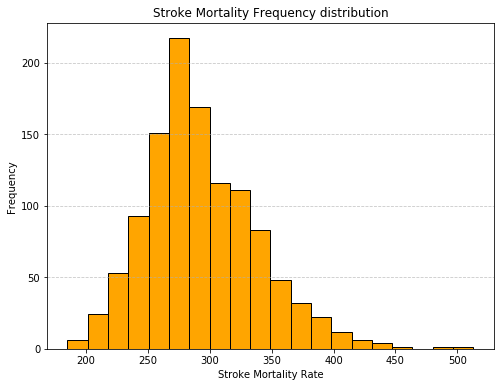

In [260]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Column1' is the column you want to plot
column_to_plot = 'Data_Value'

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.hist(merged_df[column_to_plot], bins=20, color='orange', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Stroke Mortality Frequency distribution'.format(column_to_plot))
plt.xlabel('Stroke Mortality Rate')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()


In [261]:
# Assuming 'continuous_var' is your continuous variable
# You can adjust the number of bins as needed
counts, bin_edges = np.histogram(merged_df['Data_Value'], bins='auto')


In [265]:

from scipy.stats import chisquare

# Assuming 'counts' is the array of counts obtained from binning the continuous variable
chi2_stat, p_val = chisquare(counts)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
#print('P-value > alpha : ' (p_val > 0.05))

Chi-square statistic: 1423.634782608695
P-value: 1.0314473902466581e-281


TypeError: 'str' object is not callable

In [267]:
p_val < 0.05

True

In [270]:
if p_val < 0.05:
    print('Significant')
else:
    print('Not Significant')

Significant


In summary, with such a small p-value, we would reject the null hypothesis and conclude that there is a significant difference between the observed and expected counts, suggesting that the data may not follow a Poisson distribution.

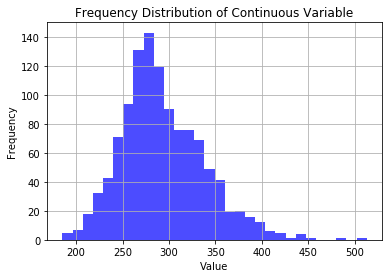

In [275]:
import matplotlib.pyplot as plt


counts, bin_edges = np.histogram(merged_df['Data_Value'], bins='auto')

plt.hist(merged_df['Data_Value'], bins='auto', color='blue', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Continuous Variable')
plt.grid(True)
plt.show()

In [306]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(merged_df.iloc[:, 6:], merged_df.Data_Value, test_size = .2)

In [307]:
merged_df.columns

Index(['LocationID', 'LocationDesc', 'Year', 'Data_Value', 'Geography_x',
       'Geographic Area Name_x',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree',
       'Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force',
       'Percent!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate',
       'Percent!!INCOME AND BENEFITS !!Total households!!Less than $10,000',
       'Percent!!INCOME AND BENEFITS !!Total households!!$10,000 to $14,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$15,000 to $24,999',
       'Pe

# Socio Economic Index 

In [281]:
SEC = merged_df[['LocationID', 'LocationDesc', 'Year', 'Data_Value', 'Geography_x',
       'Geographic Area Name_x','Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma',
       "Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree",
       "Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree",
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree',
       'Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force',
       'Percent!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate',
       'Percent!!INCOME AND BENEFITS !!Total households!!Less than $10,000',
       'Percent!!INCOME AND BENEFITS !!Total households!!$10,000 to $14,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$15,000 to $24,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$25,000 to $34,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$35,000 to $49,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$50,000 to $74,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$75,000 to $99,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$100,000 to $149,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$150,000 to $199,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$200,000 or more',
       'Percent!!INCOME AND BENEFITS !!Total households!!With earnings',
       'Estimate!!INCOME AND BENEFITS !!Total households!!Median household income (dollars)',
       'Estimate!!INCOME AND BENEFITS !!Total households!!Mean household income (dollars)',
       'Estimate!!INCOME AND BENEFITS !!Total households!!With earnings!!Mean earnings (dollars)',
       'Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage',
       'Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With private health insurance',
       'Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With public coverage',
       'Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!No health insurance coverage',
       'Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people',
       'Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years',
       'Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!18 to 64 years',
       'Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!65 years and over',
        'Physical Environment_Rank',
   
       'Violent Crime Rate', 'RUCC_Binned']]

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


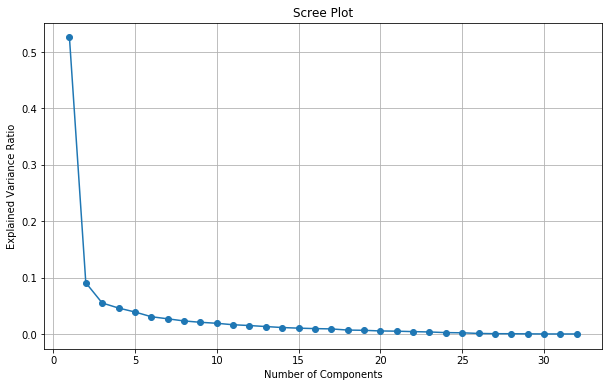

In [282]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
data_scaled = scaler.fit_transform(SEC.iloc[:,6:])


pca = PCA()
pca.fit(data_scaled)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [291]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
data_scaled = scaler.fit_transform(SEC.iloc[:,6:])


pca = PCA(n_components=3)  
pca.fit(data_scaled)


loadings = pca.components_
display(loadings)


index = data_scaled.dot(loadings[:3].T)
pd.DataFrame(index)

SEC['SEC_Index4'] = index.sum(axis = 1)


SEC.head()

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.16838914, -0.17855597,  0.0990234 ,  0.190164  ,  0.14586654,
         0.18271793, -0.12764835, -0.18465492, -0.19869984, -0.20784209,
        -0.1705134 , -0.07867973,  0.12831465,  0.20402306,  0.21384002,
         0.19325544,  0.16015852,  0.19135984,  0.23436027,  0.22689829,
         0.21739489,  0.17092026,  0.21963352, -0.20874754, -0.17092026,
        -0.2026689 , -0.19281493, -0.18546813, -0.1742199 ,  0.0069739 ,
        -0.00171822, -0.14281351],
       [ 0.01418858,  0.06106994, -0.10105735,  0.22156509,  0.33459449,
         0.01869792,  0.15154139,  0.24012704,  0.04503252, -0.01156541,
        -0.10083448, -0.27740396, -0.29540213, -0.07329438,  0.10669956,
         0.20628657,  0.27168177,  0.00735643,  0.00746776,  0.1192907 ,
         0.14923078, -0.00517023, -0.08402743,  0.00596592,  0.00517023,
         0.25037001,  0.19427583,  0.25364021,  0.1030907 ,  0.27133154,
         0.3554081 , -0.12282225],
       [-0.10458492, -0.30182649, -0.00611087,  0.2490

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,LocationID,LocationDesc,Year,Data_Value,Geography_x,Geographic Area Name_x,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade,"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma",Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree,Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Percent!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate,"Percent!!INCOME AND BENEFITS !!Total households!!Less than $10,000","Percent!!INCOME AND BENEFITS !!Total households!!$10,000 to $14,999","Percent!!INCOME AND BENEFITS !!Total households!!$15,000 to $24,999","Percent!!INCOME AND BENEFITS !!Total households!!$25,000 to $34,999","Percent!!INCOME AND BENEFITS !!Total households!!$35,000 to $49,999","Percent!!INCOME AND BENEFITS !!Total households!!$50,000 to $74,999","Percent!!INCOME AND BENEFITS !!Total households!!$75,000 to $99,999","Percent!!INCOME AND BENEFITS !!Total households!!$100,000 to $149,999","Percent!!INCOME AND BENEFITS !!Total households!!$150,000 to $199,999","Percent!!INCOME AND BENEFITS !!Total households!!$200,000 or more",Percent!!INCOME AND BENEFITS !!Total households!!With earnings,Estimate!!INCOME AND BENEFITS !!Total households!!Median household income (dollars),Estimate!!INCOME AND BENEFITS !!Total households!!Mean household income (dollars),Estimate!!INCOME AND BENEFITS !!Total households!!With earnings!!Mean earnings (dollars),Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With private health insurance,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With public coverage,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!No health insurance coverage,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!18 to 64 years,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!65 years and over,Physical Environment_Rank,Violent Crime Rate,RUCC_Binned,SEC_Index4
0,29001,Adair,2010,324.2,0500000US29001,"Adair County, Missouri",0.030,0.060,0.065,0.150,0.16,57.6,5.8,17.3,9.7,13.4,13.8,13.9,15.5,7.6,5.6,2.3,0.8,80.5,31176.0,43603.0,42212.0,86.3,69.4,27.9,13.7,26.0,21.8,29.8,13.8,56.0,431.775423,3,5.091320
1,29003,Andrew,2010,301.4,0500000US29003,"Andrew County, Missouri",0.030,0.060,0.065,0.160,0.09,70.8,6.6,5.9,5.9,11.0,11.2,13.1,23.0,13.9,12.8,2.4,0.8,80.7,52720.0,61497.0,63118.0,90.5,76.7,26.0,9.5,8.5,7.5,8.2,11.4,39.0,81.661920,1,4.888157
2,29005,Atchison,2010,341.0,0500000US29005,"Atchison County, Missouri",0.030,0.065,0.060,0.165,0.06,62.6,4.7,7.6,7.9,11.8,13.9,15.3,23.8,9.0,6.8,1.4,2.5,75.2,42375.0,55097.0,57499.0,86.6,71.1,32.3,13.4,13.1,15.6,10.1,19.3,27.0,224.166449,3,1.427800
3,29007,Audrain,2010,302.4,0500000US29007,"Audrain County, Missouri",0.045,0.100,0.070,0.090,0.05,56.0,4.3,6.5,8.6,12.7,15.5,15.4,23.3,9.0,6.8,1.3,1.0,74.8,40935.0,50277.0,49594.0,84.1,63.4,34.6,15.9,17.0,26.6,14.1,11.0,43.0,156.911165,2,-2.122389
4,29009,Barry,2010,371.5,0500000US29009,"Barry County, Missouri",0.065,0.110,0.070,0.095,0.04,60.4,8.7,8.4,8.0,15.3,16.5,18.6,18.0,8.1,4.4,1.6,1.1,74.0,36143.0,47429.0,46334.0,83.5,61.7,36.9,16.5,17.1,25.8,15.4,9.9,46.0,142.1919

In [292]:
SEC.to_csv('SEC_INDEX.CSV' , index = False)

In [287]:
index.T

array([[-1.78951366,  5.37457678,  1.26857638, ...,  2.12111617,
         3.09276349, -4.71687517],
       [ 3.24276692, -1.26593214, -1.35418879, ...,  0.50017496,
        -0.87440447,  0.66526858],
       [ 3.63807016,  0.77951322,  1.51341349, ..., -1.58378122,
        -1.76061206, -0.4792412 ]])

# Comorbidity and Lifestyle  Index

In [309]:
C_index =merged_df[[ 'LocationID', 'LocationDesc', 'Year', 'Data_Value', 'Geography_x',
       'Geographic Area Name_x',
       
       'Adult smoking_% Smokers', 
       'Poor mental health days_Mentally Unhealthy Days',
       'Poor or fair health_% Fair/Poor',
       'Poor physical health days_Physically Unhealthy Days',
        'Obesity%', 'Physical_Inactivity%']]

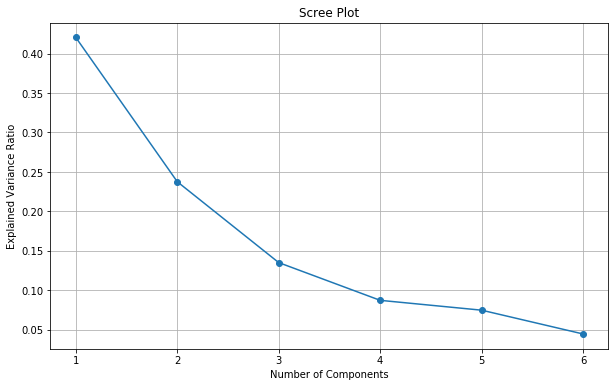

In [296]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
data_scaled = scaler.fit_transform(C_index.iloc[:,6:])

pca = PCA()
pca.fit(data_scaled)


plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [310]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
data_scaled = scaler.fit_transform(C_index.iloc[:,6:])


pca = PCA(n_components=3)
pca.fit(data_scaled)


loadings = pca.components_
display(loadings)


index = data_scaled.dot(loadings[:3].T)
pd.DataFrame(index)

#SEC['SEC_Index'] = index
C_index['comorbidity_Index4'] = index.sum(axis = 1)


C_index.head()

array([[ 0.38327795,  0.46443799,  0.54758246,  0.53100647,  0.08244077,
         0.22087206],
       [-0.07443917, -0.05794202, -0.13962143, -0.13623787,  0.72457724,
         0.65424343],
       [ 0.80009181, -0.44744686, -0.04155118, -0.21172211, -0.22614046,
         0.24890188]])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,LocationID,LocationDesc,Year,Data_Value,Geography_x,Geographic Area Name_x,Adult smoking_% Smokers,Poor mental health days_Mentally Unhealthy Days,Poor or fair health_% Fair/Poor,Poor physical health days_Physically Unhealthy Days,Obesity%,Physical_Inactivity%,comorbidity_Index4
0,29001,Adair,2010,324.2,0500000US29001,"Adair County, Missouri",19.70,3.32,18.98,4.35,18.8,33.5,-0.394683
1,29003,Andrew,2010,301.4,0500000US29003,"Andrew County, Missouri",22.83,3.01,16.04,3.18,22.8,28.9,-0.712437
2,29005,Atchison,2010,341.0,0500000US29005,"Atchison County, Missouri",26.49,3.15,17.14,3.39,14.5,25.9,-1.730114
3,29007,Audrain,2010,302.4,0500000US29007,"Audrain County, Missouri",26.99,4.47,19.73,4.47,17.1,31.9,0.798503
4,29009,Barry,2010,371.5,0500000US29009,"Barry County, Missouri",26.96,6.51,24.10,5.98,18.0,32.6,1.696340


In [315]:
merged_df.to_csv('Merged_df_final1.csv' , index = False)

In [2]:
merged_df = pd.read_csv('Merged_df_final1.csv')

# Machine Learning Models (Pipelines)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
#from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(merged_df.iloc[:, 6:], merged_df.Data_Value, test_size = .2)

In [14]:
merged_df.columns

Index(['LocationID', 'LocationDesc', 'Year', 'Data_Value', 'Geography_x',
       'Geographic Area Name_x',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree',
       'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree',
       'Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force',
       'Percent!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate',
       'Percent!!INCOME AND BENEFITS !!Total households!!Less than $10,000',
       'Percent!!INCOME AND BENEFITS !!Total households!!$10,000 to $14,999',
       'Percent!!INCOME AND BENEFITS !!Total households!!$15,000 to $24,999',
       'Pe

In [12]:
scaler = StandardScaler()
pca = PCA()
lr_regressor = LinearRegression()

pipeline_lr = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('linearregression', lr_regressor)
])

param_grid = {
              'pca__n_components': [15,20 , 25]
              }

grid_search_lr = GridSearchCV(pipeline_lr, param_grid, cv=5)
grid_search_lr.fit(X_train, y_train)
print("Linear Regression Best Score:", grid_search_lr.best_score_)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to f

/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by 

Linear Regression Best Score: 0.24920635518308157


In [13]:
grid_search_lr.best_estimator_

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Define the pipeline components
scaler = StandardScaler()
pca = PCA()
rfe = RFE(estimator=DecisionTreeRegressor())
dt_regressor = DecisionTreeRegressor()
rf_regressor = RandomForestRegressor()
lr_regressor = LinearRegression()
#xgb_regressor = XGBRegressor()

# Define parameter grids for GridSearchCV
param_grid_dt = {
    'decisiontreeregressor__max_depth': [3, 5, 7, None],
    'decisiontreeregressor__min_samples_split': [2, 5, 10],
    'decisiontreeregressor__min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'randomforestregressor__n_estimators': [100, 200, 300],
    'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'],
    'randomforestregressor__max_depth': [None, 10, 20, 30],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'xgbregressor__n_estimators': [100, 200, 300],
    'xgbregressor__learning_rate': [0.05, 0.1, 0.2],
    'xgbregressor__max_depth': [3, 5, 7]
}

# Define the pipeline for each regressor
pipeline_dt = Pipeline([
    ('scaler', scaler),
    ('pca', pca),

    ('decisiontreeregressor', dt_regressor)
])

pipeline_rf = Pipeline([
    ('scaler', scaler),

    ('rfe', rfe),
    ('randomforestregressor', rf_regressor)
])

pipeline_lr = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('linearregression', lr_regressor)
])

# pipeline_xgb = Pipeline([
#     ('scaler', scaler),
#     ('pca', pca),
#     ('rfe', rfe),
#     ('xgbregressor', xgb_regressor)
# ])


grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5)
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5)
grid_search_lr = GridSearchCV(pipeline_lr, {}, cv=5)  # No hyperparameters for Linear Regression
#grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5)


grid_search_dt.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)
grid_search_lr.fit(X_train, y_train)
#grid_search_xgb.fit(X_train, y_train)


print("Decision Tree Best Parameters:", grid_search_dt.best_params_)
print("Decision Tree Best Score:", grid_search_dt.best_score_)

print("Random Forest Best Parameters:", grid_search_rf.best_params_)
print("Random Forest Best Score:", grid_search_rf.best_score_)

print("Linear Regression Best Score:", grid_search_lr.best_score_)

# print("XGBoost Best Parameters:", grid_search_xgb.best_params_)
# print("XGBoost Best Score:", grid_search_xgb.best_score_)


Decision Tree Best Parameters: {'decisiontreeregressor__max_depth': 3, 'decisiontreeregressor__min_samples_leaf': 2, 'decisiontreeregressor__min_samples_split': 5}
Decision Tree Best Score: 0.16587012530635514
Random Forest Best Parameters: {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 200}
Random Forest Best Score: 0.5988889570248392
Linear Regression Best Score: 0.2722533088439081


Decision Tree Best Parameters: {'decisiontreeregressor__max_depth': 3, 'decisiontreeregressor__min_samples_leaf': 2, 'decisiontreeregressor__min_samples_split': 5}
Decision Tree Best Score: 0.16587012530635514
Random Forest Best Parameters: {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 200}
Random Forest Best Score: 0.5988889570248392
Linear Regression Best Score: 0.2722533088439081

In [17]:
grid_search_dt.cv_results_

{'mean_fit_time': array([0.13964014, 0.10860944, 0.14443665, 0.11791883, 0.15502839,
        0.0982964 , 0.09897394, 0.08272643, 0.09976034, 0.14220042,
        0.12723017, 0.10423079, 0.12146544, 0.10614443, 0.17665849,
        0.10681953, 0.17941008, 0.15798736, 0.15492082, 0.14349566,
        0.19200149, 0.16408968, 0.1287056 , 0.174927  , 0.14439521,
        0.16624537, 0.15661907, 0.22377605, 0.17884812, 0.18129921,
        0.1930057 , 0.19172788, 0.23136249, 0.15936685, 0.17311234,
        0.17825589]),
 'std_fit_time': array([0.07178036, 0.01987062, 0.05905771, 0.0349098 , 0.04526181,
        0.00076125, 0.0012971 , 0.03135662, 0.0034245 , 0.04473184,
        0.03671436, 0.00161083, 0.0334783 , 0.00251376, 0.03653949,
        0.00433881, 0.03491894, 0.04413881, 0.03778334, 0.04442305,
        0.00222814, 0.04230689, 0.02759627, 0.03283755, 0.04219111,
        0.04103819, 0.03909138, 0.06070192, 0.02974364, 0.06335653,
        0.003086  , 0.00359569, 0.04513575, 0.04821212, 0.032

In [18]:
grid_search_lr.cv_results_

{'mean_fit_time': array([0.13460288]),
 'std_fit_time': array([0.06835532]),
 'mean_score_time': array([0.00279379]),
 'std_score_time': array([0.00080589]),
 'params': [{}],
 'split0_test_score': array([0.29007929]),
 'split1_test_score': array([0.36299257]),
 'split2_test_score': array([0.24341232]),
 'split3_test_score': array([0.32095026]),
 'split4_test_score': array([0.14383209]),
 'mean_test_score': array([0.27225331]),
 'std_test_score': array([0.07516194]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([0.33716577]),
 'split1_train_score': array([0.32425635]),
 'split2_train_score': array([0.34665756]),
 'split3_train_score': array([0.32808995]),
 'split4_train_score': array([0.37347789]),
 'mean_train_score': array([0.3419295]),
 'std_train_score': array([0.01757397])}

In [20]:
grid_search_rf.cv_results_

{'mean_fit_time': array([1.7392724 , 2.91096015, 4.1103735 , 1.56762228, 2.61043129,
        3.63991141, 1.46481133, 2.40183978, 3.35415821, 1.51975908,
        2.51694746, 3.50331173, 1.49791112, 2.46946297, 3.43869648,
        1.41803036, 2.31645408, 3.20382166, 1.36336236, 2.20240588,
        3.03043461, 1.35760202, 2.19690557, 3.03677754, 1.3425714 ,
        2.16636219, 3.02377691, 1.00441847, 1.46893158, 1.93214846,
        0.94169631, 1.35695248, 1.77884021, 0.90966773, 1.30038905,
        1.68429637, 0.93209267, 1.33686209, 1.74758692, 0.925     ,
        1.32430382, 1.72235994, 0.89909706, 1.27352343, 1.65496082,
        0.8930388 , 1.25294495, 1.6353548 , 0.88754034, 1.25606189,
        1.61694937, 0.88002114, 1.24010944, 1.60447679, 0.99028349,
        1.45589056, 1.93832846, 0.94065514, 1.37133784, 1.79441509,
        0.91730003, 1.3183394 , 1.73004522, 0.9409452 , 1.33215985,
        1.74441075, 0.92086706, 1.31873369, 1.72182927, 0.89822965,
        1.27360559, 1.6530158 ,

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = grid_search_dt.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_ score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Decision Tree CV:')
print("Mean Squared Error:", mse)
print("Mean Squared Error:", mse)

print("R-squared (R2) Score:", r2)

Decision Tree CV:
Mean Squared Error: 1681.8859407218679
Mean Squared Error: 1681.8859407218679
R-squared (R2) Score: 0.09400135147502164


In [25]:
y_pred = grid_search_lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Linear Regression CV:')
print("Mean Squared Error:", mse)
print("Mean Squared Error:", mse)

print("R-squared (R2) Score:", r2)

Linear Regression CV:
Mean Squared Error: 1270.6847760396786
Mean Squared Error: 1270.6847760396786
R-squared (R2) Score: 0.3155072755414673


In [27]:
y_pred = grid_search_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Random Forrest Regressor CV:')
print("Mean Squared Error:", mse)
print("Mean Squared Error:", mse)

print("R-squared (R2) Score:", r2)

Random Forrest Regressor CV:
Mean Squared Error: 830.2120906902163
Mean Squared Error: 830.2120906902163
R-squared (R2) Score: 0.5527811881038736


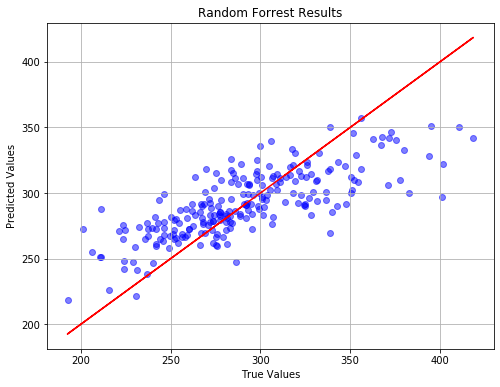

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot(true_values, true_values, color='red')  # Plotting the y=x line for reference
plt.title('Random Forrest Results')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()